In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import scipy.stats as stats

In [2]:
# Tempory data frame to pull in the drinks.csv file
temp_df = pd.read_csv("output_data/drinks.csv")

In [3]:
# Display head of data frame. Feel free to delete
temp_df.head()

,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure
0,15567,Adam Sunrise,Ordinary Drink,True,Collins Glass,"['Vodka', 'Lemonade', 'Water', 'Sugar']","['1/2 ', '1/2 can ', '1/2 ', '10 tsp ']"
1,17141,Smut,Punch / Party Drink,True,Beer mug,"['Red wine', 'Peach schnapps', 'Pepsi Cola', '...","['1/3 part ', '1 shot ', '1/3 part ', '1/3 par..."
2,15200,A Day at the Beach,Ordinary Drink,True,Highball glass,"['Coconut rum', 'Amaretto', 'Orange juice', 'G...","['1 oz ', '1/2 oz ', '4 oz ', '1/2 oz ']"
3,15743,Fuzzy Asshole,Coffee / Tea,True,Coffee mug,"['Coffee', 'Peach schnapps']","['1/2 ', '1/2 ']"
4,17168,Amaretto Sunset,Ordinary Drink,True,Collins Glass,"['Triple sec', 'Amaretto', 'Cider', 'Ice']","['1/2 jigger ', '3 shots ', '1/2 cup ', 'Add 1..."


In [4]:
# List conversion function. Let me know if there are any issues
def convert(s):
    lst = []
    temp = str(s).split(", ")
    
    for x in temp:
        lst.append(x.translate({ord(i): None for i in "[']"}))
    
    return lst

# Question One Data Analysis

In [5]:
#-------DATA MANIPULATION----------

# Necessary copy of data frame. The value count is just a test. Feel free to delete that line
glasses_df = temp_df.copy()
glasses_df = glasses_df['Glass'].value_counts()
glasses_df = glasses_df.reset_index()
glasses_df = glasses_df.rename(columns={"Glass":"Count", "index":"Glass"})

glasses_df.head()

,Glass,Count
0,cocktail glass,93
1,highball glass,77
2,old-fashioned glass,55
3,collins glass,53
4,shot glass,26


In [6]:
#-------DATA ANALYSIS-----------------

#define cuttoff value
cutoff_value = 4

#glasses with counts less than cutoff value to be grouped in miscellaneous
miscellaneous = 0 
for i in range(len(glasses_df)):
    count = glasses_df.loc[i,"Count"]
    if glasses_df.loc[i,"Count"] <= cutoff_value:
        miscellaneous +=count
        
        
#drop glasses with less than cutoff value
glasses_df = glasses_df[glasses_df.Count > cutoff_value]

#append DF with item Miscellaneous 
glasses_df = glasses_df.append({"Glass":"miscellaneous", "Count":miscellaneous}, ignore_index = True)

glasses_df.head()

,Glass,Count
0,cocktail glass,93
1,highball glass,77
2,old-fashioned glass,55
3,collins glass,53
4,shot glass,26


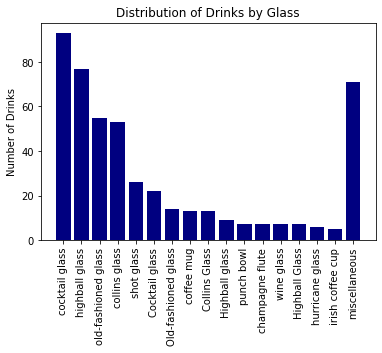

In [7]:
#------DATA DISPLAY-------------

plt.bar(glasses_df.Glass, glasses_df.Count, color = "navy")
plt.xticks(glasses_df.Glass, rotation='vertical')
plt.title("Distribution of Drinks by Glass")
plt.ylabel("Number of Drinks")
plt.savefig('output_data/Glasses_Distribution.png', bbox_inches="tight")

plt.show()

In [8]:
glasses_top5_df = glasses_df.copy()
glasses_top5_df = glasses_top5_df.head(5)
glasses_top5_df

,Glass,Count
0,cocktail glass,93
1,highball glass,77
2,old-fashioned glass,55
3,collins glass,53
4,shot glass,26


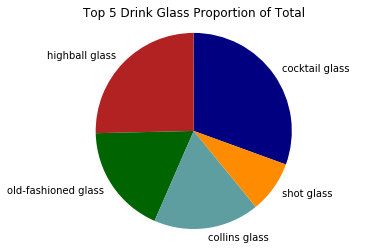

In [9]:
plt.pie(glasses_top5_df.Count, labels = glasses_top5_df.Glass, startangle =-20, colors=["navy", "firebrick", "darkgreen", "cadetblue", "darkorange"])
plt.axis('equal')  

plt.title("Top 5 Drink Glass Proportion of Total")
plt.savefig('output_data/Glasses_Top5_Distribution.png')

plt.show()

In [10]:
# Creation of main data frame. All plots should use this data (i.e. drink_df)
drink_df = temp_df.copy()
for i in range(0, len(drink_df)):
    drink_df.at[i,'Ingredients'] = convert(temp_df.loc[i,'Ingredients'])

# Question Two Data Analysis

## Creating Visualizations

In [11]:
# Adding in the final CSV that I wrote so that you can run this file. TOTALLY SAFE TO DO SO FROM HERE.
alcohol_categories_df = pd.read_csv("output_data/alcohol_categories.csv")

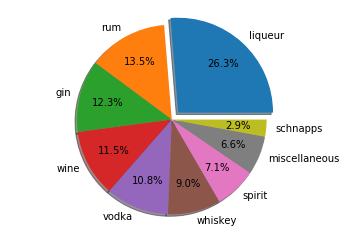

In [12]:
# This pie chart includes the top ten alcoholic categories.
# It has liqueur, which is a "catch-all" category, so might not be fair comparison.

fig1, ax1 = plt.subplots()
ax1.pie(alcohol_categories_df['Count'][0:9], labels=alcohol_categories_df['Category'][0:9], 
        explode=[0.1,0,0,0,0,0,0,0,0], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

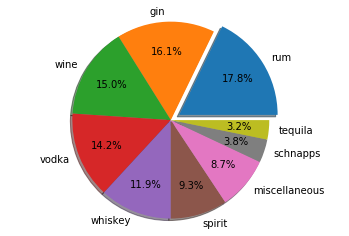

In [13]:
# This pie chart includes the top ten alcoholic categories excluding liqueur--the top alcohol category.

fig1, ax1 = plt.subplots()
ax1.pie(alcohol_categories_df['Count'][1:10], labels=alcohol_categories_df['Category'][1:10], 
        explode=[0.1,0,0,0,0,0,0,0,0], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

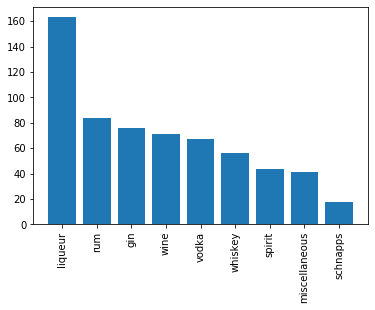

In [14]:
plt.bar(alcohol_categories_df['Category'][0:9],alcohol_categories_df['Count'][0:9])
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

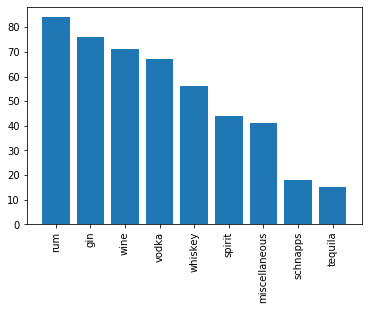

In [15]:
plt.bar(alcohol_categories_df['Category'][1:10],alcohol_categories_df['Count'][1:10])
plt.xticks(rotation='vertical')

# Question Three Data Analysis

In [16]:
# Creation of Ingredients Count Column. Feel free to delete if not needed.

drink_df['Ingredients Count'] = 0
for i in range(0, len(drink_df)):
    drink_df.loc[i,'Ingredients Count'] = len(drink_df.loc[i,'Ingredients'])
drink_df.head()

,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure,Ingredients Count
0,15567,Adam Sunrise,Ordinary Drink,True,Collins Glass,"[Vodka, Lemonade, Water, Sugar]","['1/2 ', '1/2 can ', '1/2 ', '10 tsp ']",4
1,17141,Smut,Punch / Party Drink,True,Beer mug,"[Red wine, Peach schnapps, Pepsi Cola, Orange ...","['1/3 part ', '1 shot ', '1/3 part ', '1/3 par...",4
2,15200,A Day at the Beach,Ordinary Drink,True,Highball glass,"[Coconut rum, Amaretto, Orange juice, Grenadine]","['1 oz ', '1/2 oz ', '4 oz ', '1/2 oz ']",4
3,15743,Fuzzy Asshole,Coffee / Tea,True,Coffee mug,"[Coffee, Peach schnapps]","['1/2 ', '1/2 ']",2
4,17168,Amaretto Sunset,Ordinary Drink,True,Collins Glass,"[Triple sec, Amaretto, Cider, Ice]","['1/2 jigger ', '3 shots ', '1/2 cup ', 'Add 1...",4


In [17]:
# split list into Alcoholic and Non-alcoholic data frames. Sort lists on Ingredients Count and reset index
drink_al_df = drink_df.loc[drink_df['Alcoholic'] == True].sort_values('Ingredients Count', ascending = False).reset_index(drop = True)
drink_non_df = drink_df.loc[drink_df['Alcoholic'] != True].sort_values('Ingredients Count', ascending = False).reset_index(drop = True)

In [30]:
print(f"Total alcoholic cocktails = {len(drink_al_df)}.")
drink_al_df.head()

Total alcoholic cocktails = 446.


,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure,Ingredients Count
0,12794,Angelica Liqueur,Homemade Liqueur,True,Collins Glass,"[Angelica root, Almond, Allspice, Cinnamon, An...","['3 tblsp chopped', '1 tblsp chopped ', '1 cra...",12
1,12792,Amaretto Liqueur,Homemade Liqueur,True,Collins Glass,"[Sugar, Water, Apricot, Almond flavoring, Grai...","['1 cup', '3/4 cup ', '2 ', '1 tblsp ', '1/2 c...",11
2,12910,Egg Nog #4,Punch / Party Drink,True,punch bowl,"[Egg yolk, Sugar, Milk, Light rum, Bourbon, Va...","['6 ', '1/4 cup ', '2 cups ', '1/2 cup ', '1/2...",11
3,15300,3-Mile Long Island Iced Tea,Ordinary Drink,True,Collins Glass,"[Gin, Light rum, Tequila, Triple sec, Vodka, C...","['1/2 oz ', '1/2 oz ', '1/2 oz ', '1/2 oz ', '...",9
4,13024,Sweet Sangria,Punch / Party Drink,True,pitcher,"[Red wine, Sugar, Water, Apple, Orange, Lime, ...","['2 bottles ', '1 cup ', '2 cups hot ', '1 cup...",8


In [23]:
print(f"Total non-alcoholic cocktails = {len(drink_non_df)}.")
drink_non_df.head()

Total non-alcoholic cocktails = 39.


,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure,Ingredients Count
0,12774,Masala Chai,Coffee / Tea,False,coffee mug,"[Water, Tea, Ginger, Cardamom, Cloves, Cinnamo...","['2 cups ', '3-4 tsp ', '1 chunk dried ', '3-4...",9
1,12670,Fruit Cooler,Other/Unknown,False,highball glass,"[Apple juice, Strawberries, Sugar, Lemon, Appl...","['1 can frozen ', '1 cup ', '2 tblsp ', '1 ', ...",7
2,12782,Thai Coffee,Coffee / Tea,False,highball glass,"[Coffee, Coriander, Cardamom, Sugar, Whipping ...","['6 tblsp ground', '1/4 tsp ', '4-5 whole gree...",6
3,12786,Thai Iced Tea,Coffee / Tea,False,highball glass,"[Tea, Water, Condensed milk, Ice, Mint]","['1/4 cup Thai ', '1/2 cup boiling ', '2 tsp s...",5
4,12690,Lassi - A South Indian Drink,Other/Unknown,False,Highball Glass,"[Yoghurt, Water, Cumin seed, Salt, Mint]","['1/2 cup plain ', '1 1/4 cup cold ', '1/2 tsp...",5


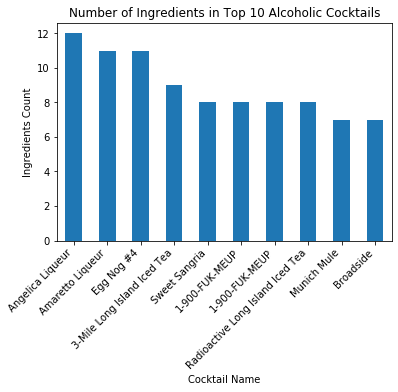

In [20]:
drink_al_df.loc[0:9,:].plot("Name","Ingredients Count", kind = 'bar', legend = False, title = "Number of Ingredients in Top 10 Alcoholic Cocktails")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Cocktail Name")
plt.ylabel("Ingredients Count")
plt.savefig('output_data/Ingredients_Count_Alcohol.png', bbox_inches="tight")
plt.show()

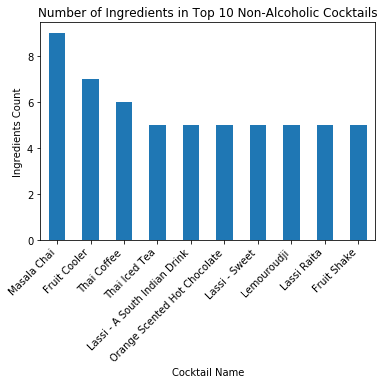

In [21]:
drink_non_df.loc[0:9,:].plot("Name","Ingredients Count", kind = 'bar', legend = False, title = "Number of Ingredients in Top 10 Non-Alcoholic Cocktails")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Cocktail Name")
plt.ylabel("Ingredients Count")
plt.savefig('output_data/Ingredients_Count_NonAlcohol.png', bbox_inches="tight")
plt.show()

In [22]:
# Create dataframe to do statistics on

complex_df = drink_al_df[["Alcoholic", "Ingredients Count"]]
complex_df = complex_df.append(drink_non_df[["Alcoholic", "Ingredients Count"]], ignore_index=True)
complex_df.replace({True: "Alcoholic", False: "Non-alcoholic"}, inplace=True)
complex_df

,Alcoholic,Ingredients Count
0,Alcoholic,12
1,Alcoholic,11
2,Alcoholic,11
3,Alcoholic,9
4,Alcoholic,8
...,...,...
480,Non-alcoholic,2
481,Non-alcoholic,2
482,Non-alcoholic,2
483,Non-alcoholic,2


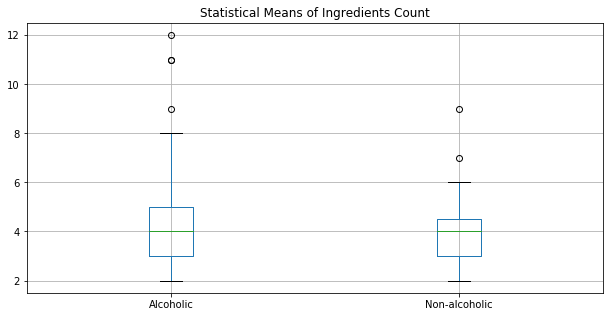

In [24]:
# Create the boxplot to see any statistically significant difference

complex_df.boxplot("Ingredients Count", by="Alcoholic", figsize=(10, 5))
plt.xlabel("")
plt.suptitle('')
plt.title("Statistical Means of Ingredients Count")
plt.savefig('output_data/Box_Plot_AverageIng.png', bbox_inches="tight")
plt.show()

In [27]:
# Extract groups and perform ANOVA
group1 = complex_df[complex_df["Alcoholic"] == "Alcoholic"]["Ingredients Count"]
group2 = complex_df[complex_df["Alcoholic"] == "Non-alcoholic"]["Ingredients Count"]

stats.f_oneway(group1, group2)

F_onewayResult(statistic=0.014269847328811067, pvalue=0.904963396704295)

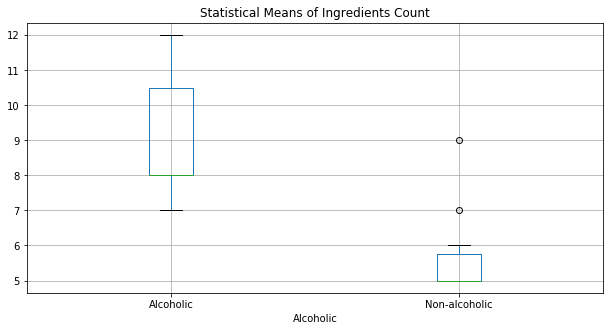

F_onewayResult(statistic=20.480000000000008, pvalue=0.0002618655396325768)

In [28]:
# Restrict to the top 10 from both lists
complex2_df = drink_al_df.loc[0:9,:][["Alcoholic", "Ingredients Count"]]
complex2_df = complex2_df.append(drink_non_df.loc[0:9,:][["Alcoholic", "Ingredients Count"]], ignore_index=True)
complex2_df.replace({True: "Alcoholic", False: "Non-alcoholic"}, inplace=True)

complex2_df.boxplot("Ingredients Count", by="Alcoholic", figsize=(10, 5))
plt.suptitle('')
plt.title("Statistical Means of Ingredients Count")
plt.savefig('output_data/Box_Plot_AverageIngTop10.png', bbox_inches="tight")
plt.show()

group1 = complex2_df[complex2_df["Alcoholic"] == "Alcoholic"]["Ingredients Count"]
group2 = complex2_df[complex2_df["Alcoholic"] == "Non-alcoholic"]["Ingredients Count"]

stats.f_oneway(group1, group2)